In [212]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import sys

%matplotlib inline

In [11]:
###-Neightbours-###

def Neighbours(N): ##(right, down, left, up)
        
    n1=np.zeros(N**2, dtype=int)
    n2=np.zeros(N**2, dtype=int)
    n3=np.zeros(N**2, dtype=int)
    n4=np.zeros(N**2, dtype=int)

    for ii in xrange(N):
        for jj in xrange(N):

            kk=(ii+1)+N*jj;

            ix1=ii+1;
            if (ix1 == N): ix1=0;
            n1[kk-1]=(ix1)+N*jj;

            iy2=jj+1
            if (iy2 == N): iy2=0;
            n2[kk-1]=(ii)+N*iy2;

            ix3=ii-1
            if (ix3 == -1): ix3=N-1;
            n3[kk-1]=(ix3)+N*jj;

            iy4=jj-1
            if (iy4 == -1): iy4=N-1;
            n4[kk-1]=(ii)+N*iy4;  
    
    return n1, n2, n3, n4

## MonteCarlo

In [12]:
###-One Monte Carlo step-###

def MC_step(I,N,h):
    
    for jj in xrange(N):
        kk=np.random.randint(0,N);     
        ib=I[kk]*(I[n1[kk]]+I[n2[kk]]+I[n3[kk]]+I[n4[kk]]);
        if ib <= 0: I[kk] *= -1; 
        elif np.random.rand() < h[ib/2+2]: I[kk] *= -1;  
    
    return I

In [13]:
###-Mesures-###

def get_m(I):
    return abs(sum(I))

def get_E(I): 
    e=0; 
    for kk in xrange(len(I)): 
        e=e+I[kk]*(I[n1[kk]]+I[n2[kk]]+I[n3[kk]]+I[n4[kk]]);
    return -e/4

In [255]:
##Size
exvec=[2,3,4,5,6];
lex=len(exvec);

##Temperatures
Tmax=5; Tmin=.1; Tstep=.1; 
ST=int((Tmax-Tmin)/Tstep)+1; Tvec=np.linspace(Tmax,Tmin,ST);

##Mesure Parameters
M0=1000; ##Termalizing steps
M=1000; ##Mesure steps

##Mesures Inizialitzation
mvec=np.zeros((lex,ST)); ##magnetitzation
Evec=np.zeros((lex,ST)); ##Energy
Suscvec=np.zeros((lex,ST)); ##Susceptibility
SpHvec=np.zeros((lex,ST)); ##Specific Heat

##Saving
file="Ising_L"

###-Loop over sizes-###

for zz in xrange(lex):
    ex=exvec[zz];
    
    ###-Inizialitzation-###

    ##Square lattice
    L=2**ex; N=L*L; (n1,n2,n3,n4)=Neighbours(L); 

    ##Initial Condition
    I = 2*np.random.randint(2, size=(N))-1;
    
    ##Averaging and Scaling
    N1=1.0/(M*N);
    N2=1.0/(N*M**2);

    ##-Main-##

    for ii in xrange(ST):

        ##Temperature
        T=Tvec[ii]; beta=1./T; beta2=1./T**2;

        ##Probability of acceptance
        jvec=np.array([-4, -2, 0, 2, 4]);
        h=np.exp(-2*jvec*beta);

        ##Termalization
        for xx in xrange(M0):
            I=MC_step(I,N,h);

        ##Mesures

        m1 = E1 = m2 = E2 = 0;

        for xx in xrange(M):
            I=MC_step(I,N,h);

            Mag=get_m(I);
            Ene=get_E(I);

            m1 = m1 + Mag;
            E1 = E1 + Ene;
            m2 = m2 + Mag**2;
            E2 = E2 + Ene**2;

        mvec[zz,ii] = m1*N1;
        Evec[zz,ii] = E1*N1;
        Suscvec[zz,ii] = (N1*m2 - N2*m1**2)*beta;
        SpHvec[zz,ii] = (N1*E2 - N2*E1**2)*beta2;
        
    np.savetxt(file+str(L)+".dat",zip(Tvec,mvec[zz,:], Evec[zz,:],Suscvec[zz,:],SpHvec[zz,:]))

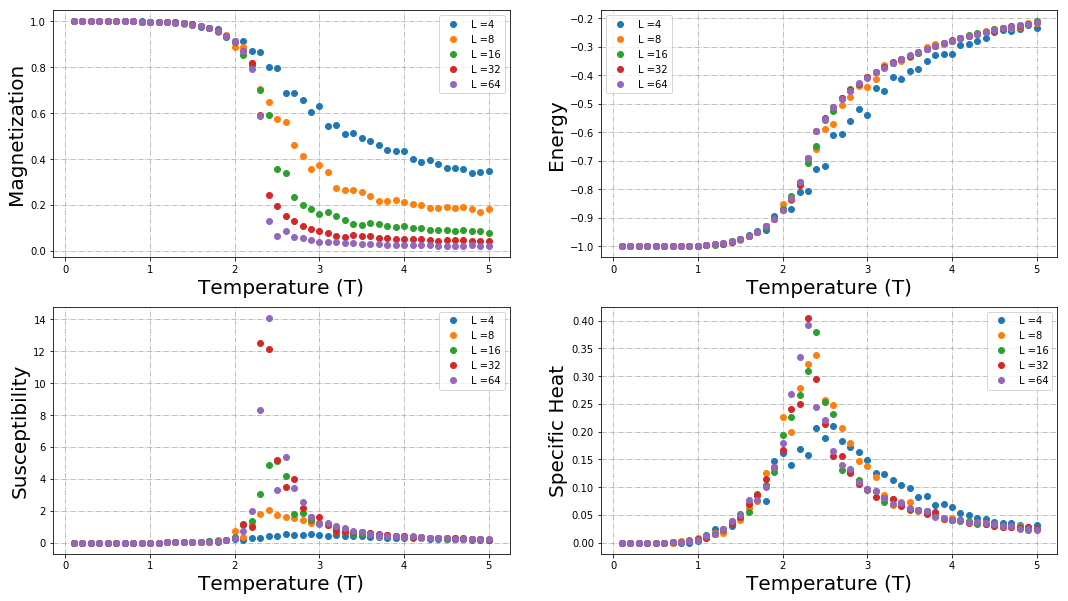

In [275]:
##Size
exvec=[2,3,4,5,6];
lex=len(exvec);

##Temperatures
Tmax=5; Tmin=.1; Tstep=.1; 
ST=int((Tmax-Tmin)/Tstep)+1; Tvec=np.linspace(Tmax,Tmin,ST);

Tc=2/(np.log(1+2**.5));
DT=np.linspace(0.01,round(Tc,3),int(1E5));
DT2=np.linspace(2,2.5,int(1E4));
DT3=np.linspace(0.01,5,int(1E5));

##Param
Kb=1.38064852*10**(-23);
pi=np.pi;

##Loading
file="Ising_L"

##Deterministic 
Dm=(1-(np.sinh(2/DT))**(-4))**.125;

DSpH=0.5*2/pi*(2/DT2)**2*(-np.log(abs(1-DT2/Tc))+np.log(Tc/2)-(1+pi/4));

k=2*np.sinh(2/DT3)/(np.cosh(2/DT3))**2;
kp=2*np.tanh((2/DT3))**2-1;
DE=-.5*np.cosh(2/DT3)/np.sinh(2/DT3)*(1+2/pi*kp*sp.ellipk(k));

##Figures
f = plt.figure(figsize=(18, 10)); # plot the calculated values 
plt.title('MonteCarlo 2D Ising Model');

for ii in xrange(lex):
    
    L=2**exvec[ii];
    Tvec, mvec, Evec, Suscvec, SpHvec = np.loadtxt(file+str(L)+".dat", unpack=True)
    
    plt.subplot(221);
    plt.plot(Tvec,mvec,'o', label= 'L =' + str(2**exvec[ii]));

    plt.subplot(222);
    plt.plot(Tvec,Evec,'o', label= 'L =' + str(2**exvec[ii]));

    plt.subplot(223);
    plt.plot(Tvec,Suscvec,'o', label= 'L =' + str(2**exvec[ii]));

    plt.subplot(224);
    plt.plot(Tvec,SpHvec,'o', label= 'L =' + str(2**exvec[ii]));

plt.subplot(221);
#plt.plot(DT,Dm,'k',linewidth=2,label='Onsager');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization", fontsize=20);
plt.legend(loc='best');
plt.grid(ls='-.');


plt.subplot(222);
#plt.plot(DT3,DE,'k',linewidth=2,label='Onsager');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy", fontsize=20);
plt.legend(loc='best');
plt.grid(ls='-.');

plt.subplot(223);
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.legend(loc='best');
plt.grid(ls='-.');

plt.subplot(224);
#plt.plot(DT2,DSpH,'k',linewidth=2,label='Onsager');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat", fontsize=20);
plt.grid(ls='-.');

plt.legend(loc='best');

# U4 MonteCarlo

In [74]:
##Size
exvec=[2,3,4,5,6];
lex=len(exvec);

##Temperatures
Tmax=5; Tmin=3.1; Tstep=.1; 
ST=int((Tmax-Tmin)/Tstep)+2; Tvec=np.linspace(Tmax,Tmin,ST);

##Temperatures
T_max=3; T_min=1.7; T_step=.01; 
S_T=int((T_max-T_min)/T_step)+1; T_vec=np.linspace(T_max,T_min,S_T);

Tvec = np.concatenate((Tvec, T_vec), axis=0); ST = ST + S_T

##Mesure Parameters
M0=1000; ##Termalizing steps
M = [1000, 2000]; ##Mesure steps

##Mesures Inizialitzation
mvec=np.zeros((lex,ST)); ##magnetitzation
Evec=np.zeros((lex,ST)); ##Energy
Suscvec=np.zeros((lex,ST)); ##Susceptibility
SpHvec=np.zeros((lex,ST)); ##Specific Heat
U4vec=np.zeros((lex,ST)); ##4th cumulant

##Saving
file="IsingTc_L"

###-Loop over sizes-###

for zz in xrange(lex):
    ex=exvec[zz];
    
    ###-Inizialitzation-###

    ##Square lattice
    L=2**ex; N=L*L; (n1,n2,n3,n4)=Neighbours(L); 

    ##Initial Condition
    I = 2*np.random.randint(2, size=(N))-1;

    ##-Main-##
    kk = 0;
    for ii in xrange(ST):
        
        ##Temperature
        T=Tvec[ii]; beta=1./T; beta2=1./T**2;
        
        if T == 2.5 : kk += 1;
        ##Averaging and Scaling
        N1=1.0/(M[kk]*N);
        N2=1.0/(N*M[kk]**2);

        ##Probability of acceptance
        jvec=np.array([-4, -2, 0, 2, 4]);
        h=np.exp(-2*jvec*beta);

        ##Termalization
        for xx in xrange(M0):
            I=MC_step(I,N,h);
            
        ##Mesures

        m1 = E1 = m2 = E2 = m4 = 0;

        for xx in xrange(M[kk]):
            I=MC_step(I,N,h);

            Mag=get_m(I);
            Ene=get_E(I);

            m1 = m1 + Mag;
            E1 = E1 + Ene;
            m2 = m2 + Mag**2;
            E2 = E2 + Ene**2;
            m4 = m4 + Mag**4;

        mvec[zz,ii] = m1*N1;
        Evec[zz,ii] = E1*N1;
        Suscvec[zz,ii] = (N1*m2 - N2*m1**2)*beta;
        SpHvec[zz,ii] = (N1*E2 - N2*E1**2)*beta2;
        U4vec[zz,ii] = 1 - (float(m4)/M[kk])/(3.*(m2/M[kk])**2);
        
    np.savetxt(file+str(L)+".dat",zip(Tvec,mvec[zz,:], Evec[zz,:],Suscvec[zz,:],SpHvec[zz,:],U4vec[zz,:]))

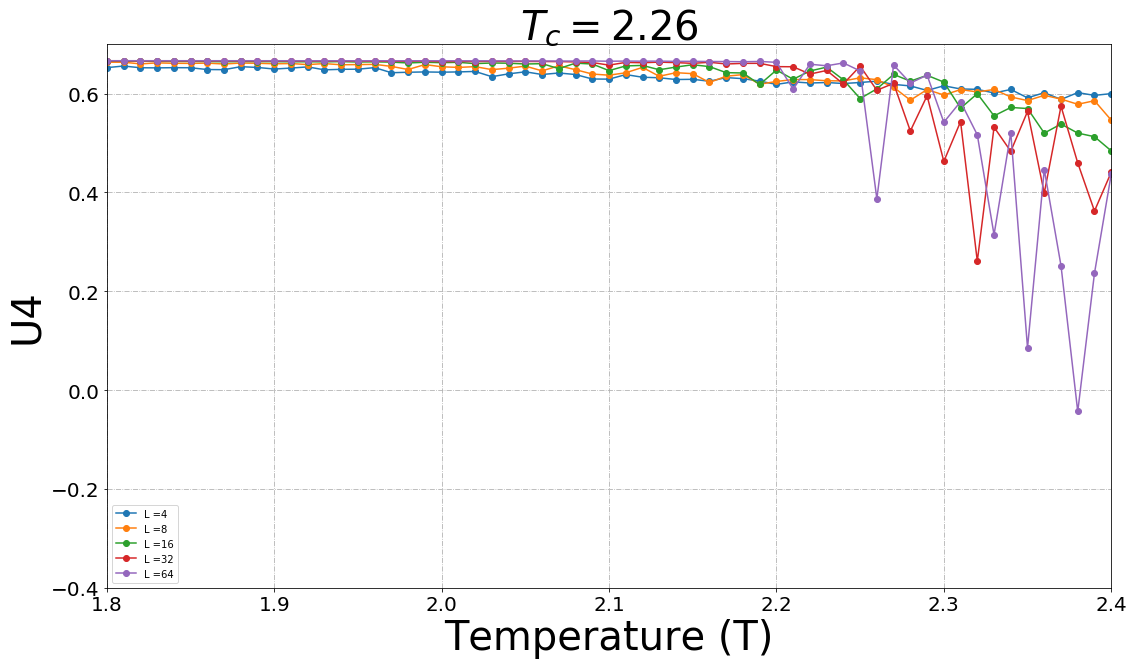

In [290]:
##Size
exvec=[2,3,4,5,6];
lex=len(exvec);

##Temperatures
T_max=3; T_min=1.7; T_step=.01; 
S_T=int((T_max-T_min)/T_step)+1; T_vec=np.linspace(T_max,T_min,S_T);

##Loading
file="IsingTc_L"

##Figures
f2 = plt.figure(figsize=(18, 10)); # plot the calculated values 

for ii in xrange(lex):
    
    L=2**exvec[ii];
    Tvec, mvec, Evec, Suscvec, SpHvec, U4vec = np.loadtxt(file+str(L)+".dat", unpack=True)
    
    plt.plot(T_vec,U4vec[-S_T:],'-o', label= 'L =' + str(2**exvec[ii]));


plt.xlabel("Temperature (T)", fontsize=40);
plt.ylabel("U4", fontsize=40);
plt.title('$T_c = 2.26$',fontsize=40)
plt.axis([1.8, 2.4, -0.4, 0.7]);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(loc='best');
plt.grid(ls='-.')

# Critical exponents - Data collapse

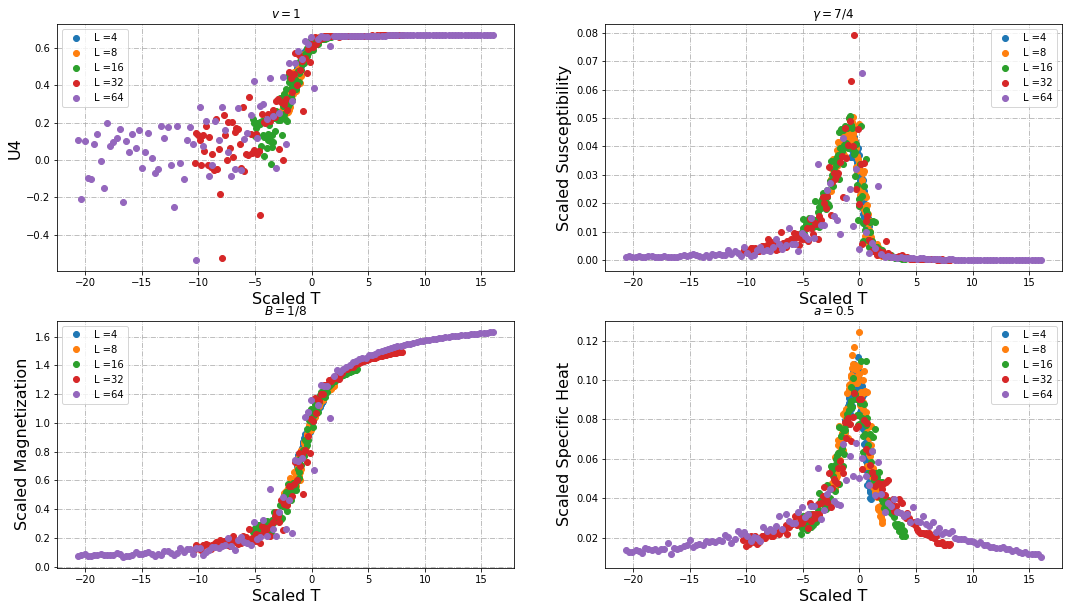

In [295]:
##Size
exvec=[2,3,4,5,6];
lex=len(exvec);

##Exponents
nu=1;
gamma=7./4;
beta=1./8;
alfa=0.5;

##Temperatures
T_max=3; T_min=1.7; T_step=.01; 
S_T=int((T_max-T_min)/T_step)+1; T_vec=np.linspace(T_max,T_min,S_T);
Tc=2/(np.log(1+2**.5));

##Loading
file="IsingTc_L"

##Figures
f2 = plt.figure(figsize=(18, 10)); # plot the calculated values 

for ii in xrange(lex):
    
    L=2**exvec[ii];
    Tvec, mvec, Evec, Suscvec, SpHvec, U4vec = np.loadtxt(file+str(L)+".dat", unpack=True)
    
    U4vec = U4vec[-S_T:];
    ScT = (1 - T_vec/Tc)*L**(1./nu);
    plt.subplot(221);
    plt.plot(ScT,U4vec,'o', label= 'L =' + str(2**exvec[ii]));
    plt.grid(ls='-.');
    
    Suscvec = Suscvec[-S_T:]; Suscvec = Suscvec*L**(-gamma/nu);
    ScT = (1 - T_vec/Tc)*L**(1./nu);
    plt.subplot(222);
    plt.plot(ScT,Suscvec,'o', label= 'L =' + str(2**exvec[ii]));
    plt.grid(ls='-.');
    
    mvec = mvec[-S_T:]; mvec = mvec*L**(beta/nu);
    ScT = (1 - T_vec/Tc)*L**(1./nu);
    plt.subplot(223);
    plt.plot(ScT,mvec,'o', label= 'L =' + str(2**exvec[ii]));
    plt.grid(ls='-.');
    
    SpHvec = SpHvec[-S_T:]; SpHvec = SpHvec*L**(-alfa/nu);
    ScT = (1 - T_vec/Tc)*L**(1./nu);
    plt.subplot(224);
    plt.plot(ScT,SpHvec,'o', label= 'L =' + str(2**exvec[ii]));
    plt.grid(ls='-.');
    
plt.subplot(221);
plt.xlabel("Scaled T", fontsize=16);
plt.ylabel("U4", fontsize=16);
plt.legend(loc='best'); 
plt.title("$v=1$")

plt.subplot(222);
plt.xlabel("Scaled T", fontsize=16);
plt.ylabel("Scaled Susceptibility", fontsize=16);
plt.legend(loc='best');
plt.title("$\gamma=7/4$");

plt.subplot(223);
plt.xlabel("Scaled T", fontsize=16);
plt.ylabel("Scaled Magnetization", fontsize=16);
plt.legend(loc='best');
plt.title("$B=1/8$");

plt.subplot(224);
plt.xlabel("Scaled T", fontsize=16);
plt.ylabel("Scaled Specific Heat", fontsize=16);
plt.legend(loc='best');
plt.title("$a=0.5$");

## Wolf

In [207]:
def Wolf_step(ii,I,L,pa):
    
    neigh = [n1[ii], n2[ii], n3[ii], n4[ii]];
    
    I[ii]=-I[ii];
    
    for kk in xrange(4):
        jj=neigh[kk];

        if I[jj] == -I[ii]:
            
            if (np.random.random() < pa): Wolf_step(jj,I,L,pa)
    
    return I

In [213]:
##Size
exvec=[2,3,4,5,6];
lex=len(exvec);

sys.setrecursionlimit(10000); 

##Temperatures
T1max=5; T1min=3.1; T1step=.1; 
ST1=int((T1max-T1min)/T1step)+2; T1vec=np.linspace(T1max,T1min,ST1);

##Temperatures
T_max=3; T_min=1.71; T_step=.01; 
S_T=int((T_max-T_min)/T_step)+1; T_vec=np.linspace(T_max,T_min,S_T);

##Temperatures
T2max=1.7; T2min=0.1; T2step=.1; 
ST2=int((T2max-T2min)/T2step)+2; T2vec=np.linspace(T2max,T2min,ST2);

Tvec = np.concatenate((T1vec, T_vec, T2vec), axis=0); ST = ST1 + S_T + ST2

##Mesure Parameters
M0=1000; ##Termalizing steps
M = [1000, 2000]; ##Mesure steps

##Mesures Inizialitzation
mvec=np.zeros((lex,ST)); ##magnetitzation
Evec=np.zeros((lex,ST)); ##Energy
Suscvec=np.zeros((lex,ST)); ##Susceptibility
SpHvec=np.zeros((lex,ST)); ##Specific Heat
U4vec=np.zeros((lex,ST)); ##4th cumulant

##Saving
file="Isingw_L"

###-Loop over sizes-###

for zz in xrange(lex):
    ex=exvec[zz];
    
    ###-Inizialitzation-###

    ##Square lattice
    L=2**ex; N=L*L; (n1,n2,n3,n4)=Neighbours(L); 

    ##Initial Condition
    I = 2*np.random.randint(2, size=(N))-1;
    
    ###########-MC-############
    
    for ii in xrange(ST1):
        
        ##Averaging and Scaling
        N1=1.0/(M[0]*N);
        N2=1.0/(N*M[0]**2);
    
        ##Temperature
        T=Tvec[ii]; beta=1./T; beta2=1./T**2;

        ##Probability of acceptance
        jvec=np.array([-4, -2, 0, 2, 4]);
        h=np.exp(-2*jvec*beta);

        ##Termalization
        for xx in xrange(M0):
            I=MC_step(I,N,h);

        ##Mesures

        m1 = E1 = m2 = E2 = m4 = 0;

        for xx in xrange(M[0]):
            I=MC_step(I,N,h);

            Mag=get_m(I);
            Ene=get_E(I);

            m1 = m1 + Mag;
            E1 = E1 + Ene;
            m2 = m2 + Mag**2;
            E2 = E2 + Ene**2;
            m4 = m4 + Mag**4;

        mvec[zz,ii] = m1*N1;
        Evec[zz,ii] = E1*N1;
        Suscvec[zz,ii] = (N1*m2 - N2*m1**2)*beta;
        SpHvec[zz,ii] = (N1*E2 - N2*E1**2)*beta2;
        U4vec[zz,ii] = 1 - (float(m4)/M[0])/(3.*(m2/M[0])**2);
        
    ###########-Wolf-###########

    for jj in xrange(S_T):
        
        ii = jj + ST1;
        
        ##Averaging and Scaling
        N1=1.0/(M[1]*N);
        N2=1.0/(N*M[1]**2);

        ##Temperature
        T=Tvec[ii]; beta=1./T; beta2=1./T**2;

        ##Probability of acceptance
        pa=1-np.exp(-2*beta)

        ##Termalization
        for xx in xrange(M0):
            ss = np.random.randint(0,N);
            I=Wolf_step(ss,I,L,pa);

        ##Mesures

        m1 = E1 = m2 = E2 = m4 = 0;

        for xx in xrange(M[1]):
            
            ss = np.random.randint(0,N);
            I=Wolf_step(ss,I,L,pa);

            Mag=get_m(I);
            Ene=get_E(I);

            m1 = m1 + Mag;
            E1 = E1 + Ene;
            m2 = m2 + Mag**2;
            E2 = E2 + Ene**2;
            m4 = m4 + Mag**4

        mvec[zz,ii] = m1*N1;
        Evec[zz,ii] = E1*N1;
        Suscvec[zz,ii] = (N1*m2 - N2*m1**2)*beta;
        SpHvec[zz,ii] = (N1*E2 - N2*E1**2)*beta2;
        U4vec[zz,ii] = 1 - (float(m4)/M[1])/(3.*(m2/M[1])**2);
        
    
    ###########-MC-############
    
    for jj in xrange(ST2):
        
        ii = jj + ST1 + S_T
        
        ##Averaging and Scaling
        N1=1.0/(M[0]*N);
        N2=1.0/(N*M[0]**2);
    
        ##Temperature
        T=Tvec[ii]; beta=1./T; beta2=1./T**2;

        ##Probability of acceptance
        jvec=np.array([-4, -2, 0, 2, 4]);
        h=np.exp(-2*jvec*beta);

        ##Termalization
        for xx in xrange(M0):
            I=MC_step(I,N,h);

        ##Mesures

        m1 = E1 = m2 = E2 = m4 = 0;

        for xx in xrange(M[0]):
            I=MC_step(I,N,h);

            Mag=get_m(I);
            Ene=get_E(I);

            m1 = m1 + Mag;
            E1 = E1 + Ene;
            m2 = m2 + Mag**2;
            E2 = E2 + Ene**2;
            m4 = m4 + Mag**4;

        mvec[zz,ii] = m1*N1;
        Evec[zz,ii] = E1*N1;
        Suscvec[zz,ii] = (N1*m2 - N2*m1**2)*beta;
        SpHvec[zz,ii] = (N1*E2 - N2*E1**2)*beta2;
        U4vec[zz,ii] = 1 - (float(m4)/M[0])/(3.*(m2/M[0])**2);
        
    np.savetxt(file+str(L)+".dat",zip(Tvec,mvec[zz,:], Evec[zz,:],Suscvec[zz,:],SpHvec[zz,:],U4vec[zz,:]))

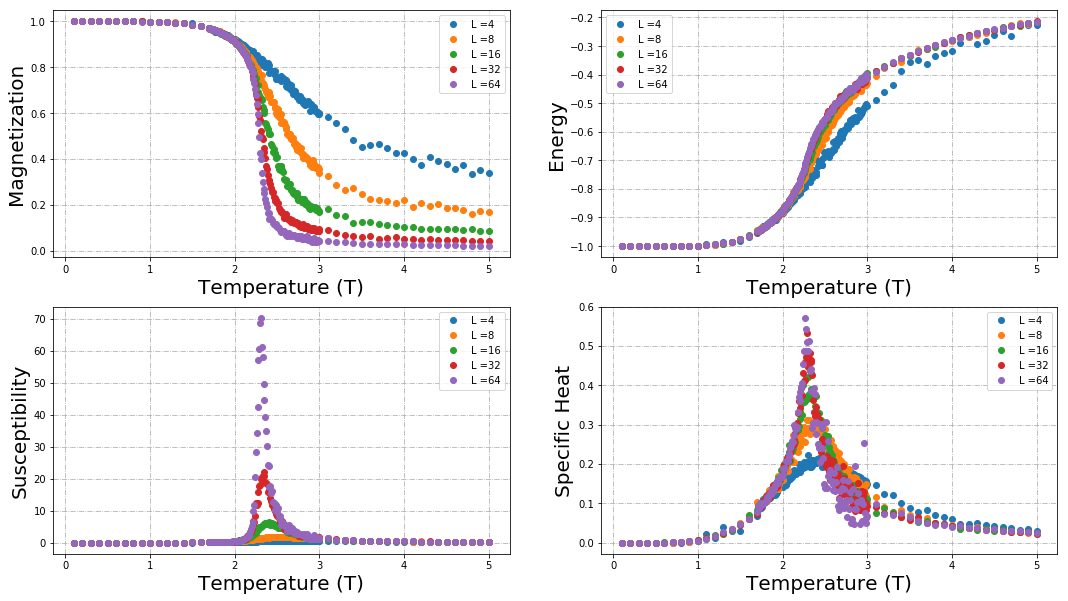

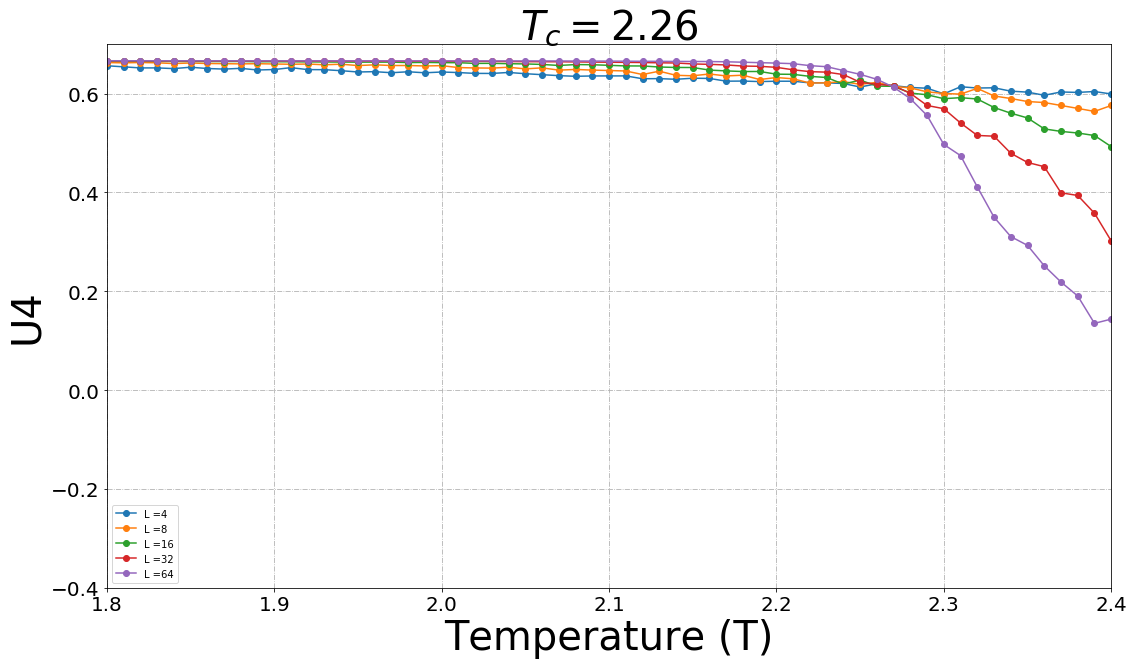

In [297]:
##Size
exvec=[2,3,4,5,6];
lex=len(exvec);

##Loading
file="Isingw_L"

##Figures
f = plt.figure(figsize=(18, 10)); # plot the calculated values 

for ii in xrange(lex):
    
    L=2**exvec[ii];
    Tvec, mvec, Evec, Suscvec, SpHvec, U4vec = np.loadtxt(file+str(L)+".dat", unpack=True)
    
    plt.subplot(221);
    plt.plot(Tvec,mvec,'o', label= 'L =' + str(2**exvec[ii]));

    plt.subplot(222);
    plt.plot(Tvec,Evec,'o', label= 'L =' + str(2**exvec[ii]));

    plt.subplot(223);
    plt.plot(Tvec,Suscvec,'o', label= 'L =' + str(2**exvec[ii]));

    plt.subplot(224);
    plt.plot(Tvec,SpHvec,'o', label= 'L =' + str(2**exvec[ii]));

plt.subplot(221);
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization", fontsize=20);
plt.legend(loc='best');
plt.grid(ls='-.');


plt.subplot(222);
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy", fontsize=20);
plt.legend(loc='best');
plt.grid(ls='-.');

plt.subplot(223);
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.legend(loc='best');
plt.grid(ls='-.');

plt.subplot(224);
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat", fontsize=20);
plt.grid(ls='-.');

plt.legend(loc='best');

########-U4-########

f2 = plt.figure(figsize=(18, 10)); # plot the calculated values 

for ii in xrange(lex):
    
    L=2**exvec[ii];
    Tvec, mvec, Evec, Suscvec, SpHvec, U4vec = np.loadtxt(file+str(L)+".dat", unpack=True)
    
    Tvec = Tvec[ST1:(ST1+S_T)]; U4vec = U4vec[ST1:(ST1+S_T)];
    
    plt.plot(Tvec,U4vec[-S_T:],'-o', label= 'L =' + str(2**exvec[ii]));

plt.xlabel("Temperature (T)", fontsize=40);
plt.ylabel("U4", fontsize=40);
plt.title('$T_c = 2.26$',fontsize=40)
plt.axis([1.8, 2.4, -0.4, 0.7]);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(loc='best');
plt.grid(ls='-.')

# Critical exp

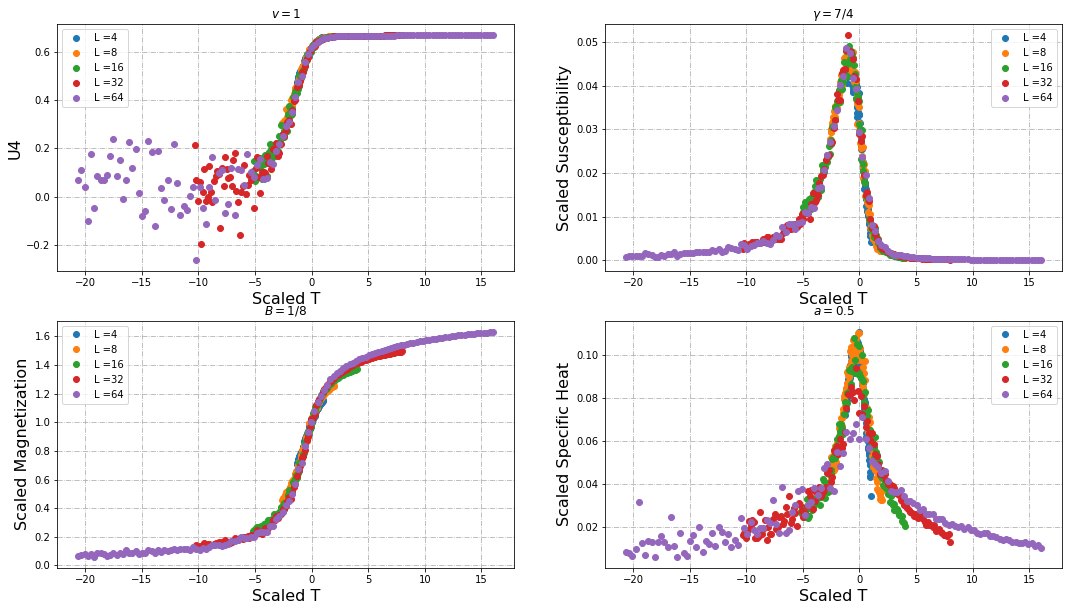

In [296]:
##Size
exvec=[2,3,4,5,6];
lex=len(exvec);

##Exponents
nu=1;
gamma=7./4;
beta=1./8;
alfa=0.5;

##Loading
file="Isingw_L"

##Figures
f2 = plt.figure(figsize=(18, 10)); # plot the calculated values 

for ii in xrange(lex):
    
    L=2**exvec[ii];
    Tvec, mvec, Evec, Suscvec, SpHvec, U4vec = np.loadtxt(file+str(L)+".dat", unpack=True)
    
    Tvec = Tvec[ST1:(ST1+S_T)]; U4vec = U4vec[ST1:(ST1+S_T)];
    mvec = mvec[ST1:(ST1+S_T)]; SpHvec = SpHvec[ST1:(ST1+S_T)]; Suscvec = Suscvec[ST1:(ST1+S_T)];
    
    
    ScT = (1 - Tvec/Tc)*L**(1./nu);
    plt.subplot(221);
    plt.plot(ScT,U4vec,'o', label= 'L =' + str(2**exvec[ii]));
    plt.grid(ls='-.');
    
    Suscvec = Suscvec*L**(-gamma/nu);
    ScT = (1 - Tvec/Tc)*L**(1./nu);
    plt.subplot(222);
    plt.plot(ScT,Suscvec,'o', label= 'L =' + str(2**exvec[ii]));
    plt.grid(ls='-.');
    
    mvec = mvec*L**(beta/nu);
    ScT = (1 - Tvec/Tc)*L**(1./nu);
    plt.subplot(223);
    plt.plot(ScT,mvec,'o', label= 'L =' + str(2**exvec[ii]));
    plt.grid(ls='-.');
    
    SpHvec = SpHvec*L**(-alfa/nu);
    ScT = (1 - Tvec/Tc)*L**(1./nu);
    plt.subplot(224);
    plt.plot(ScT,SpHvec,'o', label= 'L =' + str(2**exvec[ii]));
    plt.grid(ls='-.');
    
plt.subplot(221);
plt.xlabel("Scaled T", fontsize=16);
plt.ylabel("U4", fontsize=16);
plt.legend(loc='best'); 
plt.title("$v=1$")

plt.subplot(222);
plt.xlabel("Scaled T", fontsize=16);
plt.ylabel("Scaled Susceptibility", fontsize=16);
plt.legend(loc='best');
plt.title("$\gamma=7/4$");

plt.subplot(223);
plt.xlabel("Scaled T", fontsize=16);
plt.ylabel("Scaled Magnetization", fontsize=16);
plt.legend(loc='best');
plt.title("$B=1/8$");

plt.subplot(224);
plt.xlabel("Scaled T", fontsize=16);
plt.ylabel("Scaled Specific Heat", fontsize=16);
plt.legend(loc='best');
plt.title("$a=0.5$");